##Cassava Disease Classifier

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()
# !cat /proc/meminfo

'/device:GPU:0'

In [0]:
# !pip install fastai

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Import the required libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision import *
from fastai import *
from pathlib import Path
from fastai.metrics import error_rate # 1 - accuracy

###mount google drive

In [0]:
#read data from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!rm -R data/

In [0]:
## !rm -R data/*
## !mkdir -p data/training/ && unzip Training%20Images.zip -d data/training
## !mkdir -p data/test/ && unzip Test%20Images.zip -d data/test
## !ls data

# !unzip "/content/drive/My Drive/cgiar.zip" -d ./
! mv /content/cgiar /content/data

Archive:  /content/drive/My Drive/cgiar.zip
   creating: ./cgiar/
   creating: ./cgiar/healthy/
  inflating: ./cgiar/healthy/20190731_103120.jpg  
  inflating: ./cgiar/healthy/20190731_103131.jpg  
  inflating: ./cgiar/healthy/20190731_103138.jpg  
  inflating: ./cgiar/healthy/20190731_103154.jpg  
  inflating: ./cgiar/healthy/20190731_103223.jpg  
  inflating: ./cgiar/healthy/20190731_103226.jpg  
  inflating: ./cgiar/healthy/20190731_103237.jpg  
  inflating: ./cgiar/healthy/20190731_103245.jpg  
  inflating: ./cgiar/healthy/20190731_103252.jpg  
  inflating: ./cgiar/healthy/20190731_103304.jpg  
  inflating: ./cgiar/healthy/20190731_103308.jpg  
  inflating: ./cgiar/healthy/20190731_103312.jpg  
  inflating: ./cgiar/healthy/20190731_103315.jpg  
  inflating: ./cgiar/healthy/20190731_103320.jpg  
  inflating: ./cgiar/healthy/20190731_103324.jpg  
  inflating: ./cgiar/healthy/20190731_103341.jpg  
  inflating: ./cgiar/healthy/20190731_103355.jpg  
  inflating: ./cgiar/healthy/20190731

In [0]:
##delete the four photos that will be used for model inferencing
!rm data/healthy/Thumbs.db
!rm data/diseased/20180712_105007.jpg
!rm data/diseased/20180921_211846.jpg

!rm data/healthy/20190731_101823.jpg
!rm data/healthy/20190731_102509.jpg

# !ls data/

In [0]:
##list the data directory
import os
# print(os.listdir("./color"))
print(os.listdir("./data"))

['healthy', 'diseased']


In [0]:
## Set the path
path= Path('./')
# path.ls()
path_train = path/'data'

# ! find ./data/training/ -name '*.TIF' -exec rename .TIF .jpg {} \;

###Prepare the data. Split data to training and validationset

In [0]:
np.random.seed(8)
# bs = 64
bs = 16
tfms = get_transforms(flip_vert=True, max_warp=0)

data = ImageDataBunch.from_folder(path_train, 
                                  valid_pct=0.2,
                                  train=".",
#                                   test="./test",
                                  ds_tfms=tfms,
                                  size=224,bs=bs, 
                                  num_workers=0).normalize(imagenet_stats)

In [0]:
print(data.classes)
len(data.classes),data.c

['diseased', 'healthy']


(2, 2)

### Show some images

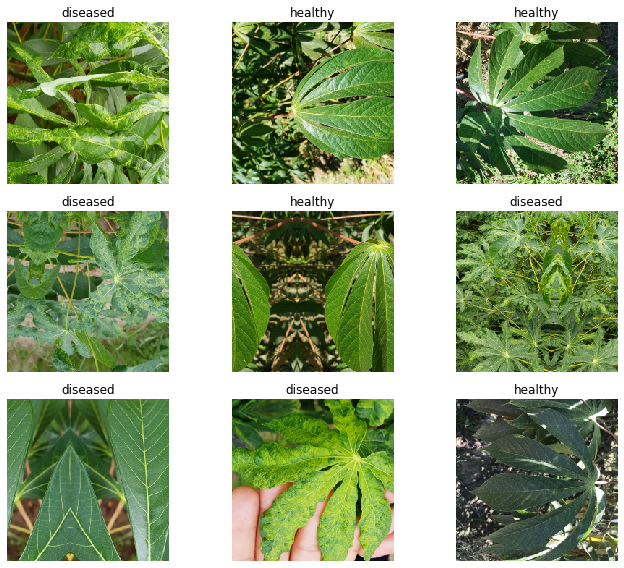

In [0]:
data.show_batch(rows=3, figsize=(10,8))

### Model training
Transfer Learning used

In [0]:
arch = models.resnet50
# learn = create_cnn(data, arch)
learn = cnn_learner(data, arch, metrics=error_rate)


In [0]:
# learn.fit_one_cycle(4)

defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.123839,0.533222,0.166667,00:17
1,0.650635,0.362994,0.083333,00:17
2,0.470692,0.275352,0.083333,00:17
3,0.360828,0.207168,0.083333,00:17


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


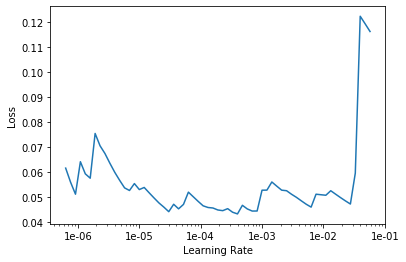

In [0]:
# learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

### save and load model

In [0]:
learn.save('stage-1')
learn.export()
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: data;

Valid: LabelList (12 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
healthy,diseased,diseased,healthy,healthy
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [0]:
!ls -lh data/

total 84M
drwxr-xr-x 2 root root 4.0K Dec 10 11:21 diseased
-rw-r--r-- 1 root root  84M Dec 10 12:28 export.pkl
drwxr-xr-x 2 root root 4.0K Dec 10 11:21 healthy
drwxr-xr-x 2 root root 4.0K Dec 10 12:28 models


###Visualizing most incorrect images

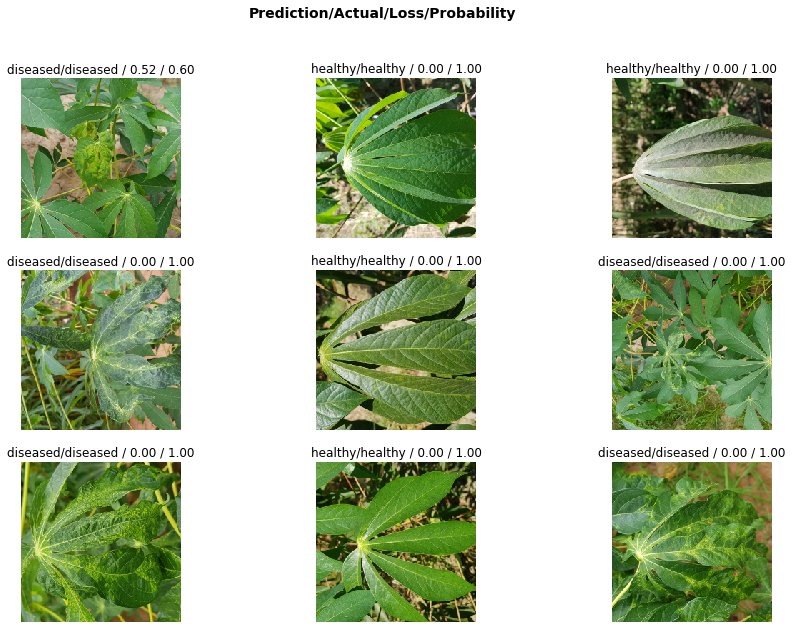

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# losses,idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(15, 10))

###Confusion Matrix

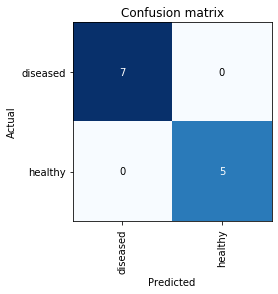

In [0]:
interp.plot_confusion_matrix()


#Upload Test Images (.Zip format)

In [0]:
# ### Upload test images
# from google.colab import files
# uploaded = files.upload()

In [0]:
# !ls
# !rm -R test test_images/
# !ls

rm: cannot remove 'test_images/': No such file or directory
data  drive  sample_data  test_images.zip


In [0]:
# # !mkdir test
# import zipfile
# import os

# for fn in uploaded.keys():
#     !unzip $fn -d .
#     !mv test_images test
    
# #     print(fn)
# #     with zipfile.ZipFile(fn, 'r') as zip_ref:
# #        dest = zip_ref.extractall('./')

!unzip test_images.zip

Archive:  test_images.zip
   creating: test_images/
  inflating: test_images/diseased_1.jpg  
  inflating: test_images/diseased_2.jpg  
  inflating: test_images/healthy_1.jpg  
  inflating: test_images/healthy_2.jpg  


In [0]:
dataframes = []
# path = "./"
# directory = "test"

# for directory in ('test'):
#     test = ImageItemList.from_folder(path/directory)
#     learn = load_learner('data', test=test)
learn = load_learner('data', test=ImageList.from_folder('./test_images'))
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn.data.test_ds.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
dataframes.append(df)
    
    
df = pd.concat(dataframes)
# df.to_csv(path/'submission.csv', index=False)
print(df.head())

   image_name      tags
0   healthy_2   healthy
1   healthy_1   healthy
2  diseased_2  diseased
3  diseased_1  diseased


In [0]:
# # learn.data.test_ds[1][0]
img = []
for i in range(len(learn.data.test_ds)):
    img = learn.data.test_ds[i][0]
    lbl = learn.data.classes
    img.show()
#     _,axs = plt.subplots(1,4,figsize=(12,4))
#     for i,ax in enumerate(axs): img.show(ax=ax, title=f'Copy {i+1}')


# img = [learn.data.test_ds[i][0] for i in range(len(learn.data.test_ds))]
# img

[Image (3, 224, 224),
 Image (3, 224, 224),
 Image (3, 224, 224),
 Image (3, 224, 224)]